# Support Vector Machine (SVM) in Machine Learning

# What is Support Vector Machine (SVM)

Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithm which is used for both classification and regression. But generally, they are used in classification problems. In 1960s, SVMs were first introduced but later they got refined in 1990 also. SVMs have their unique way of implementation as compared to other machine learning algorithms. Now a days, they are extremely popular because of their ability to handle multiple continuous and categorical variables.

# Working of SVM

The goal of SVM is to find a hyperplane that separates the data points into different classes. A hyperplane is a line in 2D space, a plane in 3D space, or a higher-dimensional surface in n-dimensional space. The hyperplane is chosen in such a way that it maximizes the margin, which is the distance between the hyperplane and the closest data points of each class. The closest data points are called the support vectors.

The distance between the hyperplane and a data point "x" can be calculated using the formula

distance = (w . x + b) / ||w|| 

where "w" is the weight vector, "b" is the bias term, and "||w||" is the Euclidean norm of the weight vector. The weight vector "w" is perpendicular to the hyperplane and determines its orientation, while the bias term "b" determines its position.

The optimal hyperplane is found by solving an optimization problem, which is to maximize the margin subject to the constraint that all data points are correctly classified. In other words, we want to find the hyperplane that maximizes the margin between the two classes while ensuring that no data point is misclassified. This is a convex optimization problem that can be solved using quadratic programming.

If the data points are not linearly separable, we can use a technique called kernel trick to map the data points into a higher-dimensional space where they become separable. The kernel function computes the inner product between the mapped data points without computing the mapping itself. This allows us to work with the data points in the higherdimensional space without incurring the computational cost of mapping t

Let's understand it in detail with the help of following diagram

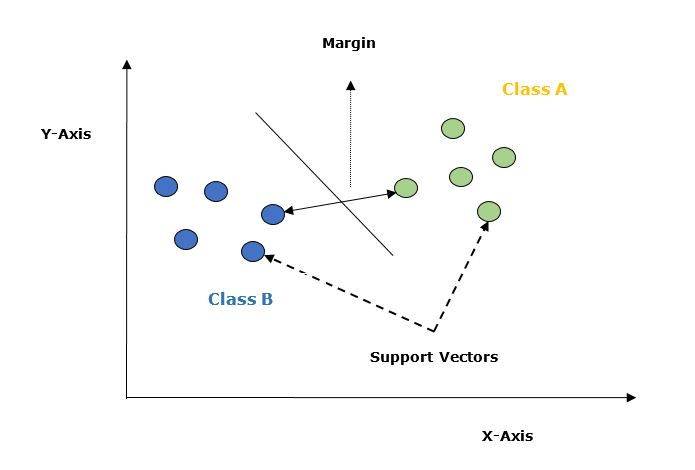hem.

Support Vectors − Datapoints that are closest to the hyperplane is called support vectors. Separating line will be defined with the help of these data points.

Hyperplane − As we can see in the above diagram it is a decision plane or space which is divided between a set of objects having different classes.

Margin − It may be defined as the gap between two lines on the closet data points of different classes. It can be calculated as the perpendicular 
distance from the line to the support vectors. Large margin is considered as a good margin and small margin is considered as a bad margin.

# Implementing SVM Using Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

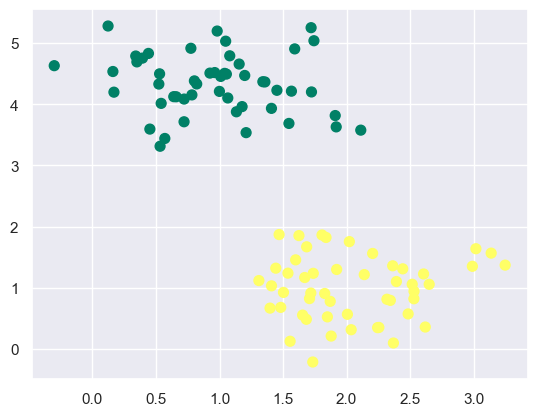

In [2]:
# Next, we are creating a sample dataset, having linearly separable data, from sklearn.dataset.sample_generator for classification using SVM

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

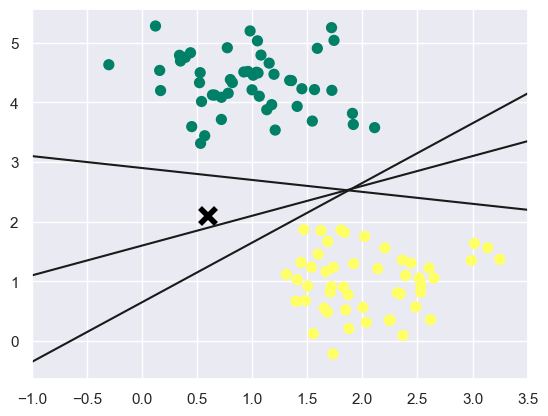

In [3]:
# We know that SVM supports discriminative classification. it divides the classes from each other by simply finding a line in case of two dimensions or manifold in case of multiple dimensions. It is implemented on the above dataset

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color='black', markeredgewidth=4, markersize=12)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
   plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);   

We can see from the above output that there are three different separators that perfectly discriminate the above samples.

As discussed, the main goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH) hence rather than drawing a zero line between classes we can draw around each line a margin of some width up to the nearest point

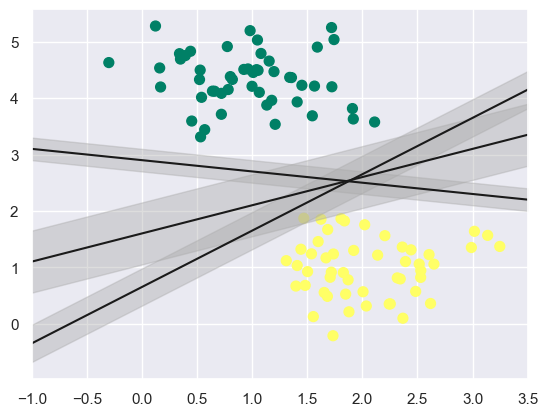

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
        color='#AAAAAA', alpha=0.4)
  plt.xlim(-1, 3.5);

From the above image in output, we can easily observe the "margins" within the discriminative classifiers. SVM will choose the line that maximizes the margin.

Next, we will use Scikit-Learn's support vector classifier to train an SVM model on this data. Here, we are using linear kernel to fit SVM

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def decision_function(model, ax=None, plot_support=True):
    if ax is None:
      ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])

    if plot_support:
       ax.scatter(model.support_vectors_[:, 0],
          model.support_vectors_[:, 1],
          s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

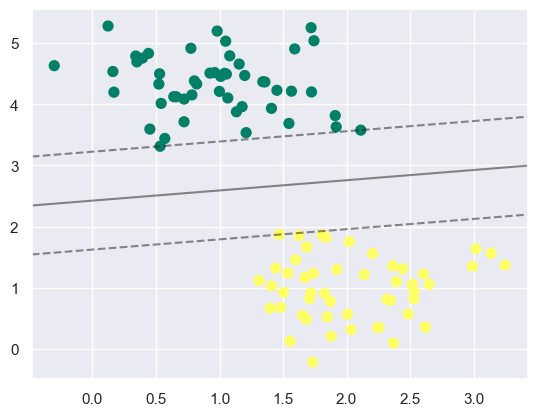

In [7]:
# Now, use this function to fit our models

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
decision_function(model);

We can observe from the above output that an SVM classifier fit to the data with margins i.e. dashed lines and support vectors, the pivotal elements of this fit, touching the dashed line. These support vector points are stored in the support_vectors_ attribute of the classifier

In [8]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

# SVM Kernels

In practice, SVM algorithm is implemented with kernel that transforms an input data space into the required form. SVM uses a technique called the kernel trick in which kernel takes a low dimensional input space and transforms it into a higher dimensional space. In simple words, kernel converts non-separable problems into separable problems by adding more dimensions to it. It makes SVM more powerful, flexible and accurate. The following are some of the types of kernels used by SVM −


#### Linear Kernel

It can be used as a dot product between any two observations. The formula of linear kernel is as below −

k(x,xi) = sum(x*xi)

From the above formula, we can see that the product between two vectors say 𝑥 & 𝑥𝑖 is the sum of the multiplication of each pair of input values.



#### Polynomial Kernel

It is more generalized form of linear kernel and distinguish curved or nonlinear input space. Following is the formula for polynomial kernel −

K(x, xi) = 1 + sum(x * xi)^d

Here d is the degree of polynomial, which we need to specify manually in the learning algorithm.


#### Radial Basis Function (RBF) Kernel

RBF kernel, mostly used in SVM classification, maps input space in indefinite dimensional space. Following formula explains it mathematically −

K(x,xi) = exp(-gamma * sum((x – xi^2))

Here, gamma ranges from 0 to 1. We need to manually specify it in the learning algorithm. A good default value of gamma is 0.1.

As we implemented SVM for linearly separable data, we can implement it in Python for the data that is not linearly separable. It can be done by using kernels.

Example
The following is an example for creating an SVM classifier by using kernels. We will be using iris dataset from scikit-learn 

In [9]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [10]:
# Now, we need to load the input data 

iris = datasets.load_iris()

In [11]:
# From this dataset, we are taking first two features

X = iris.data[:, :2]
y = iris.target

In [12]:
# Next, we will plot the SVM boundaries with original data

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
   np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [13]:
# Now, we need to provide the value of regularization parameter

C = 1.0

Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

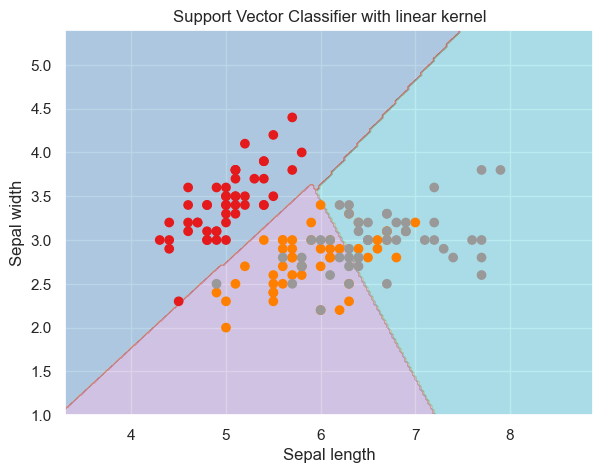

In [14]:
# Next, SVM classifier object can be created

svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)

Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

Text(0.5, 1.0, 'Support Vector Classifier with rbf kernel')

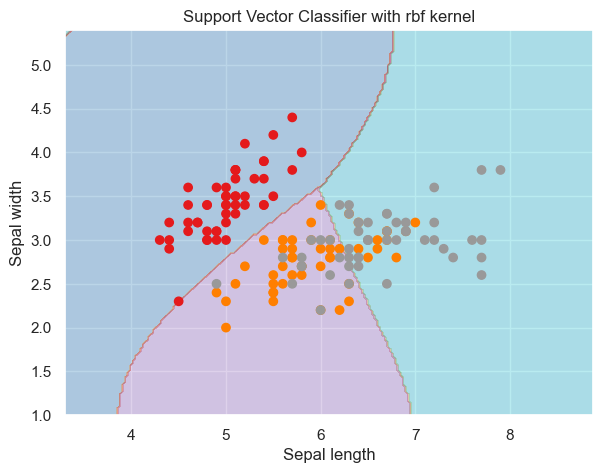

In [15]:
# For creating SVM classifier with rbf kernel, we can change the kernel to rbf

svc_classifier = svm.SVC(kernel='rbf', gamma ='auto',C=C).fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')

# We put the value of gamma to 'auto' but you can provide its value between 0 to 1 also

# Tuning SVM Parameters

In practice, SVMs often require tuning of their parameters to achieve optimal performance. The most important parameters to tune are the kernel, the regularization parameter C, and the kernel-specific parameters.

The kernel parameter determines the type of kernel to use. The most common kernel types are linear, polynomial, radial basis function (RBF), and sigmoid. The linear kernel is used for linearly separable data, while the other kernels are used for non-linearly separable data.

The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error. A higher value of C means that the classifier will try to minimize the classification error at the expense of a smaller margin, while a lower value of C means that the classifier will try to maximize the margin even if it means more misclassifications.

The kernel-specific parameters depend on the type of kernel being used. For example, the polynomial kernel has parameters for the degree of the polynomial and the coefficient of the polynomial, while the RBF kernel has a parameter for the width of the Gaussian function.

We can use cross-validation to tune the parameters of the SVM. Cross-validation involves splitting the data into several subsets and training the classifier on each subset while using the remaining subsets for testing. This allows us to evaluate the performance of the classifier on different subsets of the data and choose the best set of parameters.

In [16]:
#Example
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the parameter grid
param_grid = {
   'C': [0.1, 1, 10, 100],
   'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   'degree': [2, 3, 4],
   'coef0': [0.0, 0.1, 0.5],
   'gamma': ['scale', 'auto']
}

# create an SVM classifier
svm = SVC()

# perform grid search to find the best set of parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# print the best set of parameters and their accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'coef0': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Best accuracy: 0.7916666666666666


We start by importing the GridSearchCV module from scikit-learn, which is a tool for performing grid search on a set of parameters. We define a parameter grid that contains the possible values for each parameter we want to tune.

We create an SVM classifier using SVC() and then pass it to GridSearchCV along with the parameter grid and the number of cross-validation folds (cv=5). We then call grid_search.fit(X_train, y_train) to perform the grid search.

Once the grid search is complete, we print the best set of parameters and their accuracy using grid_search.best_params_ and grid_search.best_score_, respectively.

This means that the best set of parameters found by the grid search are: C=0.1, coef0=0.5, degree=3, gamma=scale, and kernel=poly. The accuracy achieved by this set of parameters on the training set is 97.5%.

You can now use these parameters to create a new SVM classifier and test its performance on the testing set.

# Pros and Cons of SVM Classifiers


#### Pros of SVM classifiers

SVM classifiers offers great accuracy and work well with high dimensional space. SVM classifiers basically use a subset of training points hence in result uses very less memory.


#### Cons of SVM classifiers

They have high training time hence in practice not suitable for large datasets. Another disadvantage is that SVM classifiers do not work well with overlapping classes.